# Convolutional Neural Networks
Load a pretrained network from TensorFlow Hub, ResNet50 - a 50 layer deep network trained to recognize 1000 objects. Starting usage:

In [1]:
# Download the images and store them

!pip install google_images_download

from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)

     |████████████████████████████████| 911kB 5.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/f3/7b/d1d7a18d9784458622ef3f9702c0bdbc179b431adde169c1a0
Successfully built google-images-download

Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 3.ARK_6.jpg
Image URL: https://greenglobaltravel.com/wp-content/uploads/2017/04/Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Completed Image ====> 4.Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Image URL: https://www.nps.gov/voya/learn/nature/images/VOYA_web_deer.jpg?max

In [0]:
# View images

from IPython.display import Image

paths = []
for path in absolute_image_paths: 
  if type(path) == dict:
    for p in path['animal national park']:
      paths.append(p)

In [17]:
len(paths)

20

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


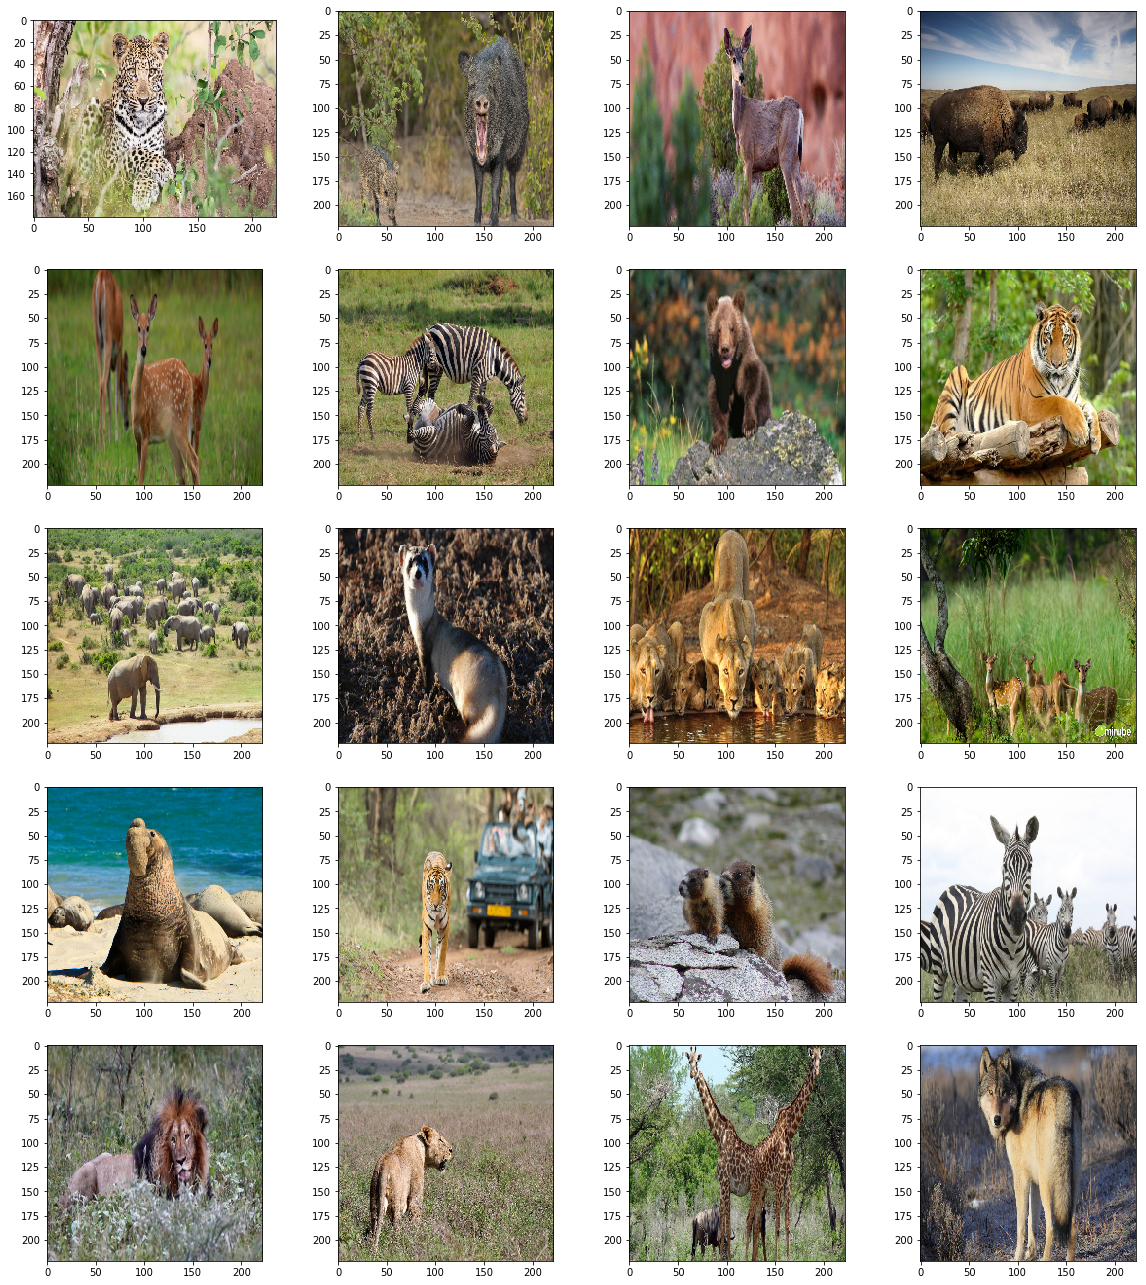

In [21]:
import matplotlib.pyplot as plt
from vis.utils import utils
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,23)
  
f, ax = plt.subplots(nrows=5, ncols=4)

ax[0,0].imshow(utils.load_img(paths[0], target_size=(180,222)))
ax[0,1].imshow(utils.load_img(paths[1], target_size=(222,222)))
ax[0,2].imshow(utils.load_img(paths[2], target_size=(222,222)))
ax[0,3].imshow(utils.load_img(paths[3], target_size=(222,222)))
ax[1,0].imshow(utils.load_img(paths[4], target_size=(222,222)))
ax[1,1].imshow(utils.load_img(paths[5], target_size=(222,222)))
ax[1,2].imshow(utils.load_img(paths[6], target_size=(222,222)))
ax[1,3].imshow(utils.load_img(paths[7], target_size=(222,222)))
ax[2,0].imshow(utils.load_img(paths[8], target_size=(222,222)))
ax[2,1].imshow(utils.load_img(paths[9], target_size=(222,222)))
ax[2,2].imshow(utils.load_img(paths[10], target_size=(222,222)))
ax[2,3].imshow(utils.load_img(paths[11], target_size=(222,222)))
ax[3,0].imshow(utils.load_img(paths[12], target_size=(222,222)))
ax[3,1].imshow(utils.load_img(paths[13], target_size=(222,222)))
ax[3,2].imshow(utils.load_img(paths[14], target_size=(222,222)))
ax[3,3].imshow(utils.load_img(paths[15], target_size=(222,222)))
ax[4,0].imshow(utils.load_img(paths[16], target_size=(222,222)))
ax[4,1].imshow(utils.load_img(paths[17], target_size=(222,222)))
ax[4,2].imshow(utils.load_img(paths[18], target_size=(222,222)))
ax[4,3].imshow(utils.load_img(paths[19], target_size=(222,222)))

# ResNet50 model

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [9]:
type(ResNet50)

function

In [0]:
# Pre-trained model

PTModel = ResNet50(weights='imagenet')

In [29]:
# Take an image instance, turn into an np array with float32,
# match the shape of the image to the shape of the pretrained model
# preprocess the data
# use pre trained model to classify image
# use decode_predictions to eval perfomance

for path in paths:
  ImgPath = path
  Img = image.load_img(ImgPath, target_size=(224, 224))
  InputIMG = image.img_to_array(Img)
  InputIMG = np.expand_dims(InputIMG, axis=0)
  InputIMG = preprocess_input(InputIMG)
  PredData = PTModel.predict(InputIMG)
  print('Predicted:', decode_predictions(PredData, top=2)[0])

Predicted: [('n02128385', 'leopard', 0.8464764), ('n02128925', 'jaguar', 0.1442565)]
Predicted: [('n02120505', 'grey_fox', 0.29400292), ('n02114367', 'timber_wolf', 0.11311486)]
Predicted: [('n03498962', 'hatchet', 0.17266525), ('n02415577', 'bighorn', 0.12721537)]
Predicted: [('n02410509', 'bison', 0.99975306), ('n07802026', 'hay', 0.00010129162)]
Predicted: [('n02423022', 'gazelle', 0.6626246), ('n02422699', 'impala', 0.13926797)]
Predicted: [('n02391049', 'zebra', 0.9979431), ('n02422106', 'hartebeest', 0.0002631924)]
Predicted: [('n02132136', 'brown_bear', 0.98519325), ('n02133161', 'American_black_bear', 0.013398946)]
Predicted: [('n02129604', 'tiger', 0.8434663), ('n02123159', 'tiger_cat', 0.14193927)]
Predicted: [('n02504458', 'African_elephant', 0.9674866), ('n02408429', 'water_buffalo', 0.012640192)]
Predicted: [('n02423022', 'gazelle', 0.4218734), ('n01877812', 'wallaby', 0.26237068)]
Predicted: [('n02397096', 'warthog', 0.50058687), ('n02396427', 'wild_boar', 0.2602599)]
Pre

# Inception ResnetV2

In [0]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

In [0]:
# Pre-trained model

PTModel = InceptionResNetV2(weights='imagenet')

In [52]:
# Take an image instance, turn into an np array with float32,
# match the shape of the image to the shape of the pretrained model
# preprocess the data
# use pre trained model to classify image
# use decode_predictions to eval perfomance

for path in paths:
  ImgPath = path
  Img = image.load_img(ImgPath, target_size=(229, 229))
  InputIMG = image.img_to_array(Img)
  InputIMG = np.expand_dims(InputIMG, axis=0)
  InputIMG = preprocess_input(InputIMG)
  PredData = PTModel.predict(InputIMG)
  print('Predicted:', decode_predictions(PredData, top=2)[0])

ValueError: ignored

In [0]:
# module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
# height, width = hub.get_expected_image_size(module)
# images = ...  # A batch of images with shape [batch_size, height, width, 3].
# logits = module(images)  # Logits with shape [batch_size, num_classes].

Report both the most likely estimated class for any image, and also investigate (a) images where the classifier isn't that certain (the best estimate is low), and (b) images where the classifier fails.

Answer (in writing in the notebook) the following - "What sorts of images do CNN classifiers do well with? What sorts do they not do so well? And what are your hypotheses for why?"